In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from matplotlib.pyplot import figure

In [2]:
def getDataset(csv_file):
    T = pd.read_csv(csv_file, index_col=False)
    return T

In [22]:
for i in range(0,3):
    print(i)

0
1
2


In [38]:
def printFigure(time_list, fac, w,h):
    num = len(time_list)
    plt.figure()
    figure(figsize=(w,h), dpi=80)
    for i in range(0,num):
        plt.subplot(1,num,i+1)
        fac[str(time_list[i])].plot()
        plt.title(f'{time_list[i]}th')
    

In [28]:
T300 = getDataset('T300.csv')

In [16]:
time_list = [0,1,2,3,4]

<Figure size 432x288 with 0 Axes>

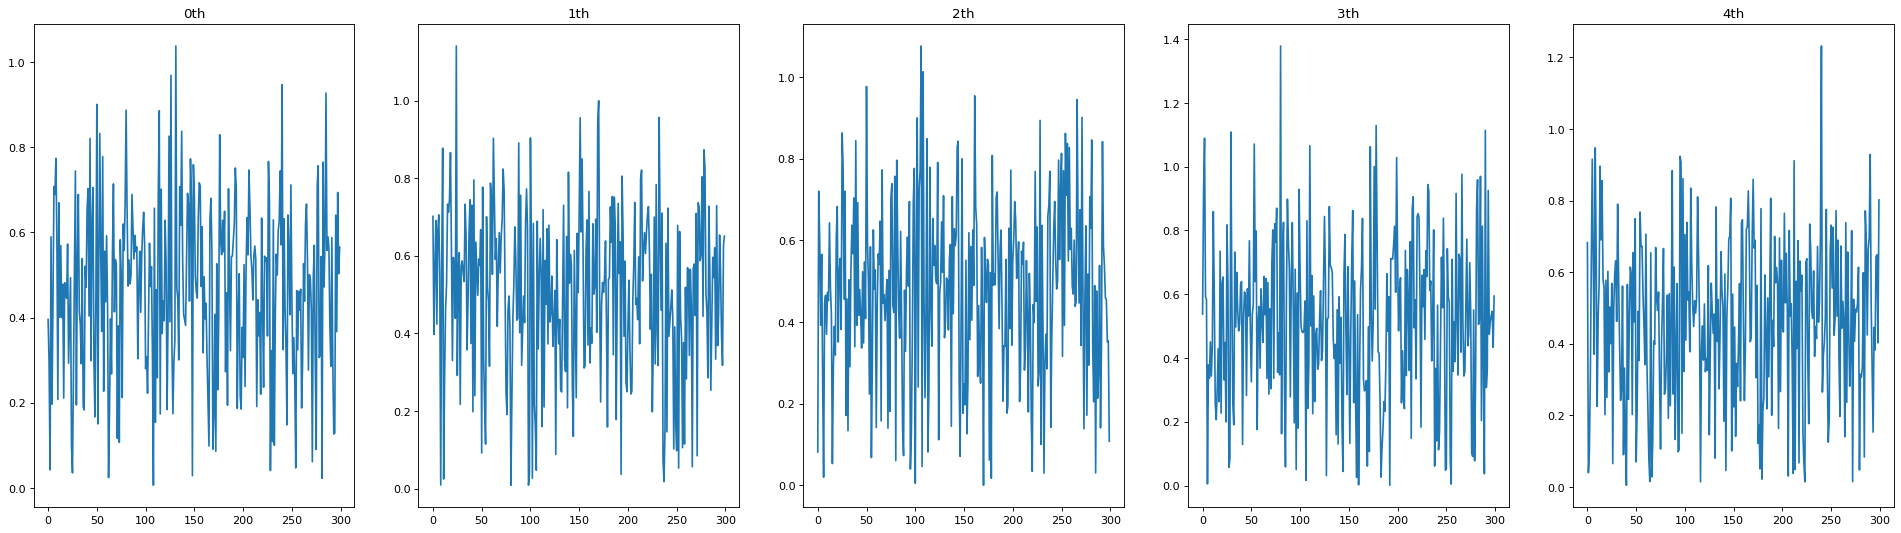

In [39]:
printFigure(time_list,T300,30,8)

<AxesSubplot:>

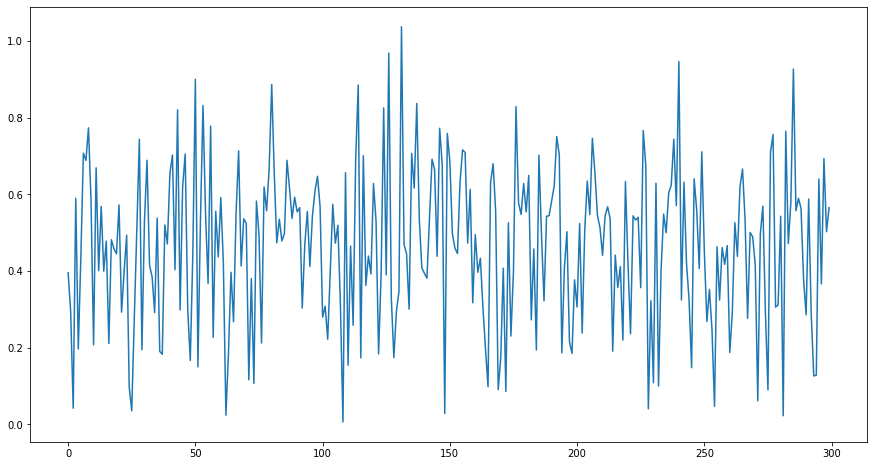

In [42]:
figure(figsize=(15,8))
T300['0'].plot()

Text(0.5, 1.0, '4th')

<Figure size 432x288 with 0 Axes>

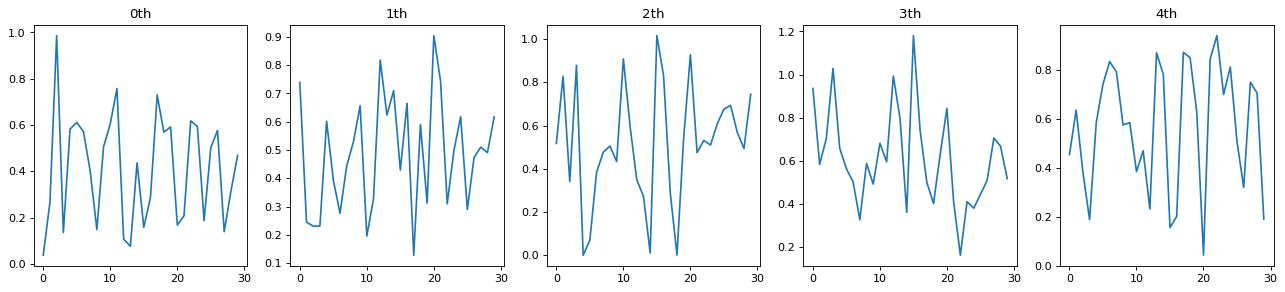

In [8]:
a=T['0']
b=T['1']
c=T['2']
d=T['3']
e=T['4']

plt.figure()
figure(figsize=(20, 4), dpi=80)
plt.subplot(1,5,1)
a.plot()
plt.title('0th')

plt.subplot(1,5,2)
b.plot()
plt.title('1th')

plt.subplot(1,5,3)
c.plot()
plt.title('2th')

plt.subplot(1,5,4)
d.plot()
plt.title('3th')

plt.subplot(1,5,5)
e.plot()
plt.title('4th')

<Figure size 432x288 with 0 Axes>

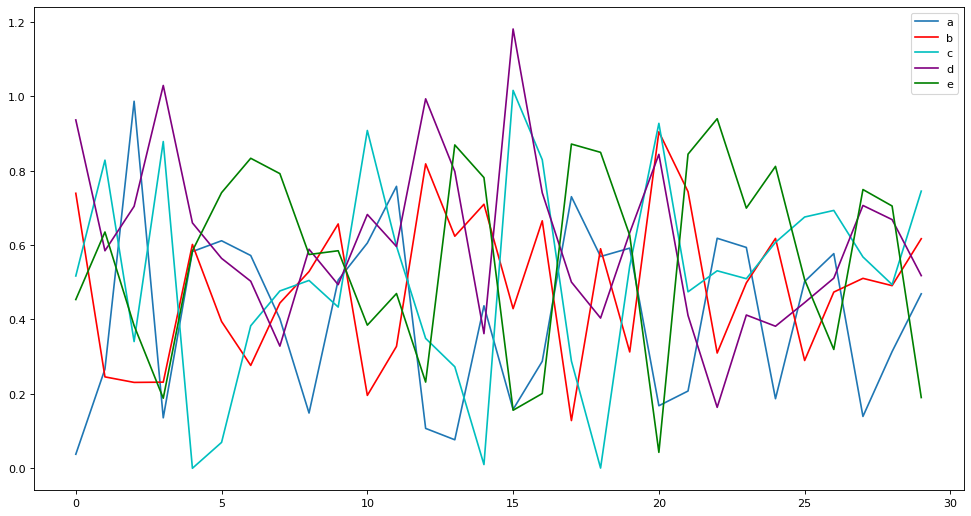

In [56]:
plt.figure(2)
figure(figsize=(15,8),dpi=80)
plt.plot(a,label='a')
plt.plot(b,color='r',label='b')
plt.plot(c,color='c',label='c')
plt.plot(d,color='purple',label='d')
plt.plot(e,color='g',label='e')
plt.legend()

<AxesSubplot:>

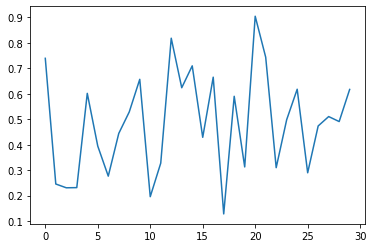

In [33]:
b=T['1']
b.plot()

In [57]:
a_train = a.iloc[:-10]
a_test = a.iloc[-10:]

In [30]:
def splitDataset(series,n):
    train = series[:-n]
    test = series[-n:]
    return train,test

In [61]:
def buildModelHWES(train,test,seasonp,n,zoom):
    model = HWES(train, seasonal_periods=seasonp, trend='add',seasonal='mul')
    fit = model.fit(optimized=True,use_brute=True)
    #print(fit.summary())
    forecast = fit.forecast(steps=n)
    
    fig = plt.figure()
    past, = plt.plot(train[-zoom:].index, train[-zoom:], 'b.-', label='Traffic histroy')
    future, = plt.plot(test[-zoom:].index, test[-zoom:], 'r.-', label='Traffic future')
    predicted, = plt.plot(test[-zoom:].index, forecast, 'g.-', label='Traffic predicted')
    plt.legend()
    fig.show()

/home/seyunkim/anaconda3/envs/syenv/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/seyunkim/anaconda3/envs/syenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


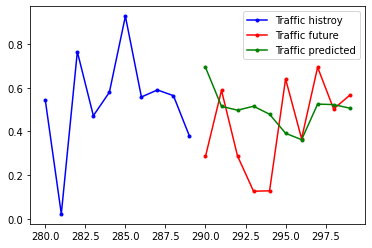

In [62]:
n=10
period=25
zoom=10
T300_train, T300_test = splitDataset(T300['0'],n)
buildModelHWES(T300_train,T300_test,period,n,zoom)

In [64]:
real_forecast = fit.forecast(steps=10)

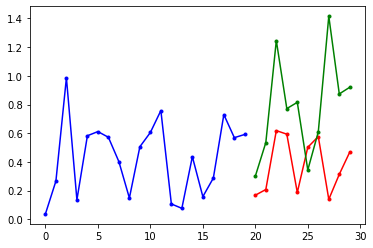

In [66]:
fig = plt.figure()
past, = plt.plot(a_train.index, a_train, 'b.-', label='Traffic histroy')
future, = plt.plot(a_test.index, a_test, 'r.-', label='Traffic future')
predicted, = plt.plot(a_test.index, real_forecast, 'g.-', label='Traffic predicted')